<a href="https://colab.research.google.com/github/eric2164/Eric-Gonzalez-Skyline-Math-200/blob/main/Python_Notebook_Setup_2_by_Eric_Gonzalez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question #2 : Is there an association between religion and intended amount of children to have, including current children?


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,


Codebook 1:

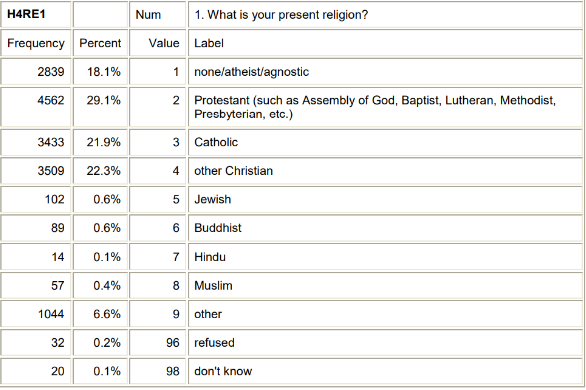![image.png]()

In [ ]:
#Manage data for variable 1

In [4]:
df['H4RE1'].value_counts()

2     1675
      1390
4     1128
1      962
3      925
9      330
5       34
6       24
8       14
96      11
98       7
7        4
Name: H4RE1, dtype: int64

In [5]:
df['Religion'] = df['H4RE1']
df['Religion'].value_counts()

2     1675
      1390
4     1128
1      962
3      925
9      330
5       34
6       24
8       14
96      11
98       7
7        4
Name: Religion, dtype: int64

In [6]:
df['Religion'] = df['Religion'].loc[df['Religion'] != ' ']
df['Religion'] = df['Religion'].loc[df['Religion'] != '9']
df['Religion'] = df['Religion'].loc[df['Religion'] != '96']
df['Religion'] = df['Religion'].loc[df['Religion'] != '98']
df['Religion'].value_counts()

2    1675
4    1128
1     962
3     925
5      34
6      24
8      14
7       4
Name: Religion, dtype: int64

In [7]:
df['Religion'].replace(['2', '4', '1', '3', '5', '6', '8', '7'], ['Protestant', 'Other Christian', 'None', 'Catholic', 'Jewish', 'Buddhist', 'Muslim', 'Hindu'], inplace = True)
df['Religion'].value_counts()

Protestant         1675
Other Christian    1128
None                962
Catholic            925
Jewish               34
Buddhist             24
Muslim               14
Hindu                 4
Name: Religion, dtype: int64

In [ ]:
#Graphs and tables or statistics

In [10]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import researchpy as rp

In [12]:
rp.summary_cat(df['Religion'])

,Variable,Outcome,Count,Percent
0,Religion,Protestant,1675,35.14
1,,Other Christian,1128,23.67
2,,None,962,20.18
3,,Catholic,925,19.41
4,,Jewish,34,0.71
5,,Buddhist,24,0.50
6,,Muslim,14,0.29
7,,Hindu,4,0.08


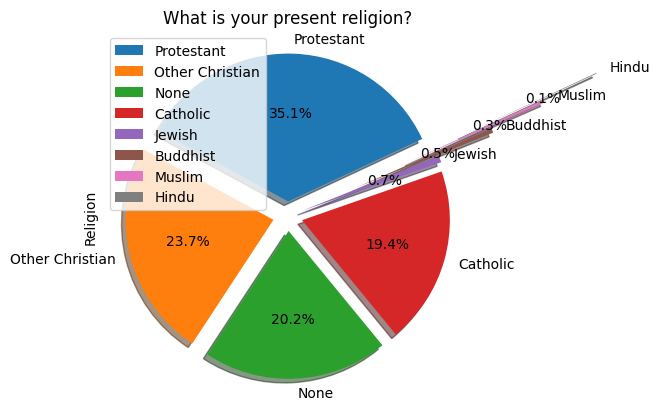

In [8]:
plt.title("What is your present religion?")
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.9, 1.3)
df['Religion'].value_counts().plot(kind ='pie', autopct='%1.1f%%',  explode=explode, shadow=True, startangle=25)
plt.legend(loc ="upper left")

<Axes: title={'center': 'What is your present religion?'}>

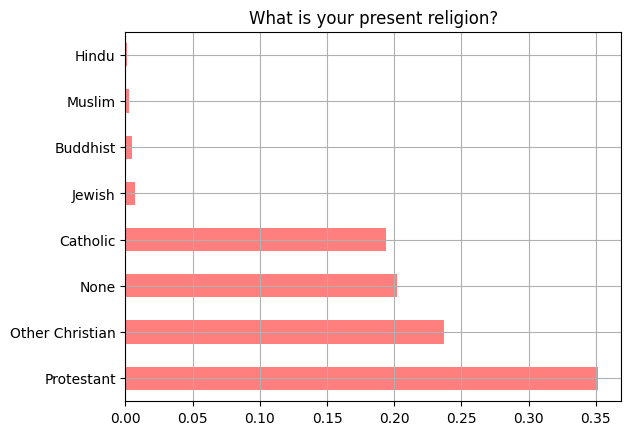

In [9]:
plt.title("What is your present religion?")
df['Religion'].value_counts(normalize = True).plot(kind ='barh', color = 'red', width = 0.5, alpha = 0.5, grid = True)

Codebook 2:

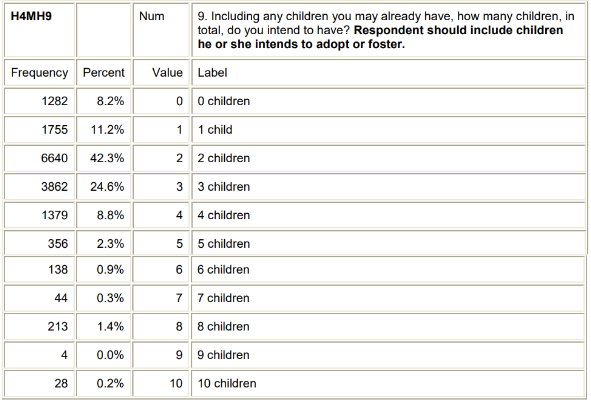

In [ ]:
#Manage data for variable 1

In [13]:
df['H4MH9'].dtype

dtype('O')

In [14]:
df['Intended_children_amount'] = df['H4MH9']
df['Intended_children_amount'].dtype

dtype('O')

In [15]:
df['Intended_children_amount'] = pd.to_numeric(df['Intended_children_amount'], errors = 'coerce')
df['Intended_children_amount'].dtype

dtype('float64')

In [16]:
df['Intended_children_amount'] = df['Intended_children_amount'].loc[df['Intended_children_amount'] != ' ']
df['Intended_children_amount'].max()

10.0

In [ ]:
#Graphs and tables or statistics

In [17]:
rp.summary_cont(df['Intended_children_amount'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Intended_children_amount,5114.0,2.341,1.3991,0.0196,2.3027,2.3794


In [18]:
rp.summarize(df['Intended_children_amount'])

,Name,N,Mean,Median,Variance,SD,SE,95% Conf. Interval
0,Intended_children_amount,5114,2.341,2.0,1.9576,1.3991,0.0196,"[2.3027, 2.3794]"


In [19]:
df['Intended_children_amount'].describe()

count    5114.000000
mean        2.341025
std         1.399146
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: Intended_children_amount, dtype: float64

<Axes: xlabel='Intended_children_amount', ylabel='Percent'>

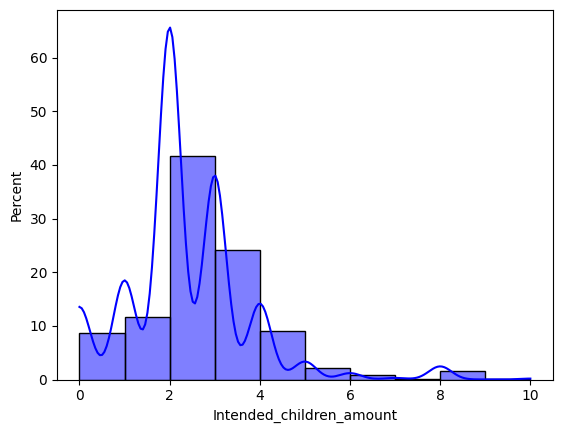

In [20]:
sns.histplot(x = 'Intended_children_amount', data = df, bins = 10, kde = True, color = 'blue', stat = 'percent')

<Axes: xlabel='Intended_children_amount'>

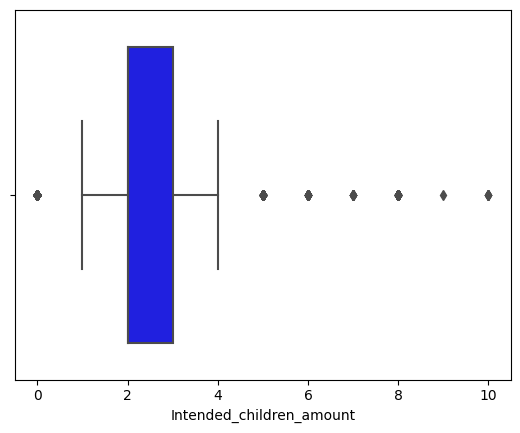

In [21]:
sns.boxplot(x = 'Intended_children_amount', data = df, color = 'blue')